# FIRST

# FORECAST FUTURE (предсказание будущего)

Предсказание количества пассажиров для авиалиний

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
rcParams['figure.figsize']=10,6 # параметры для рисунков

In [4]:
df1=pd.read_csv("AirPassengers.csv")

In [5]:
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [7]:
df1.Month=pd.to_datetime(df1.Month, infer_datetime_format=True)
indexedDataset=df1.set_index(["Month"]) #делаем индексами наши месяцы (даты) для построения графика

In [8]:
from datetime import datetime

In [9]:
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


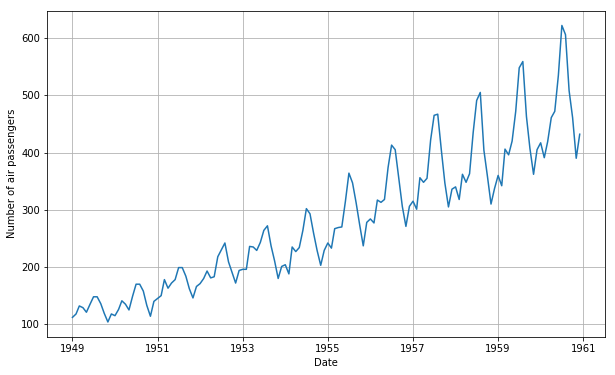

In [10]:
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset);
plt.grid("on")

Используем скользящее окно размером 12, чтобы брать значения каждого года, а не каждого месяца, для пдсчета среднего и стандартного отклонения

In [11]:
rolmean=indexedDataset.rolling(window=12).mean()

rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

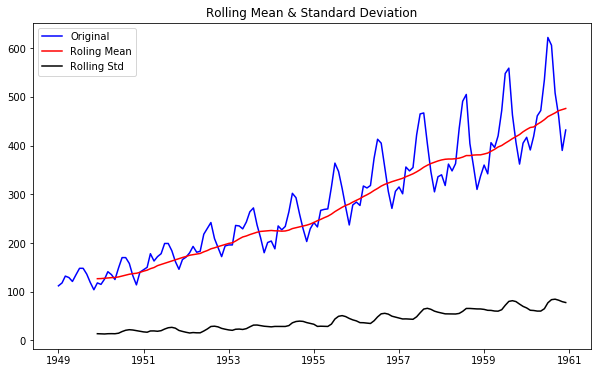

In [12]:
orig=plt.plot(indexedDataset, color="blue", label="Original")
mean=plt.plot(rolmean, color='red', label="Roling Mean")
std=plt.plot(rolstd,color="black", label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)

Используем статистику: Тест Dickey-Fuller

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
print("Results of Dickey-Fuller Test")
dftest=adfuller(indexedDataset['#Passengers'], autolag="AIC")

dfoutput=pd.Series(dftest[0:4], index=["Test Statistic", "p-value", '#Lags Used', "Number of Observation Used"])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


ТАк как p-value больше нуля, то мы отклоняем нулевую гипотезу о стационарности временного ряда, и принимаем альтернативную гипотезу об его нестационарности

# Оценка тренда

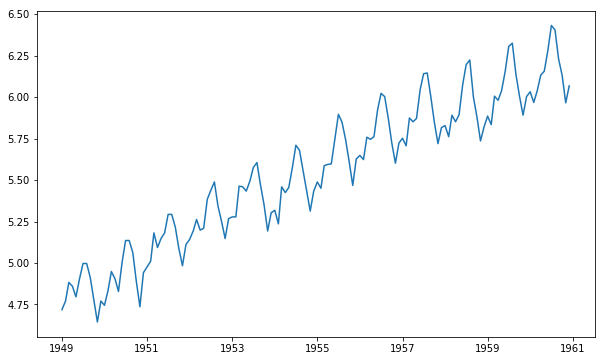

In [15]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale);

Попробуем привести данные к стационарному временному ряду

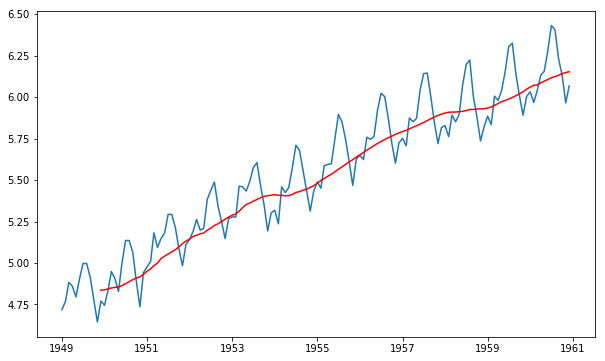

In [16]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [17]:
datasetLogScaleMinusAverage=indexedDataset_logScale - movingAverage
datasetLogScaleMinusAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [18]:
datasetLogScaleMinusAverage.dropna(inplace=True)
datasetLogScaleMinusAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [21]:
def test_stationarity(timeseries):
    
    #Determing rolling statistic
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig=plt.plot(timeseries, color="blue", label="Original")
    mean=plt.plot(movingAverage, color = "red", label="Roling Mean")
    std = plt.plot(movingSTD, color = "black", label= "Rolling Std")
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test")
    dftest=adfuller(timeseries['#Passengers'], autolag="AIC")

    dfoutput=pd.Series(dftest[0:4], index=["Test Statistic", "p-value", '#Lags Used', "Number of Observation Used"])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print(dfoutput)

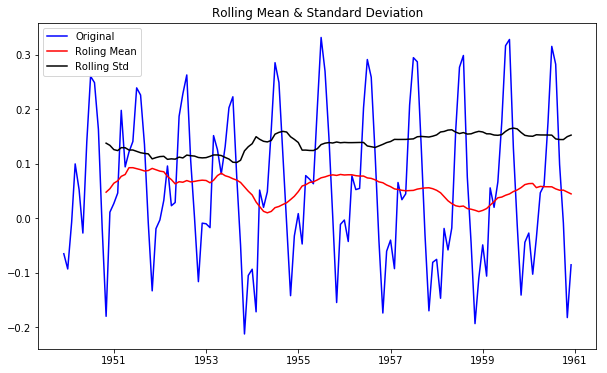

Results of Dickey-Fuller Test
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observation Used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [22]:
test_stationarity(datasetLogScaleMinusAverage)

Таким образом мы привели наш временной ряд к стационарному виду, так как p-value значительно уменьшился

Рассчитаем средвзвешенное значение

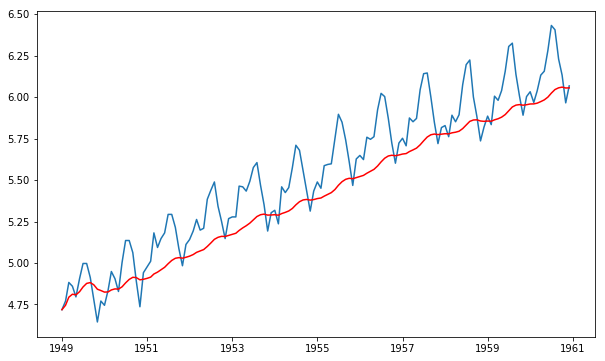

In [23]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color="red")

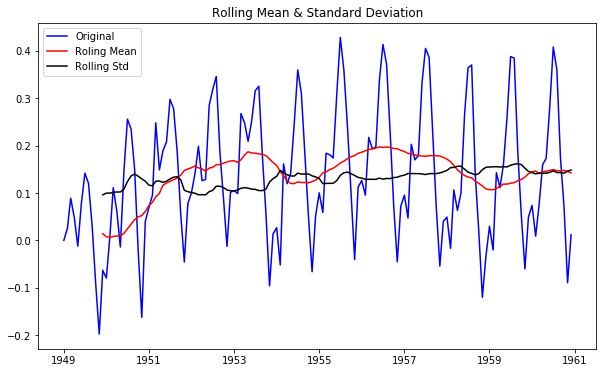

Results of Dickey-Fuller Test
Test Statistic                 -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [24]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Параметры временного ряда стали еще лучше чем были

Теперь сдвинем наши значения во времени и посмотрим на их разницу

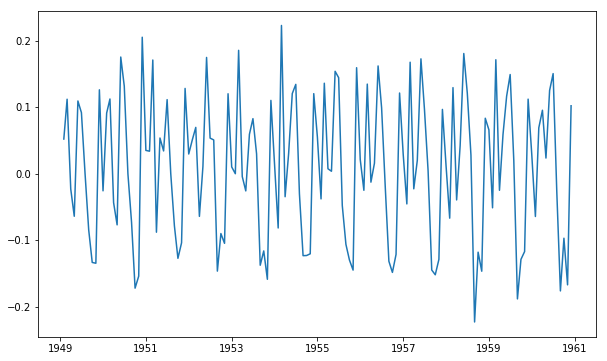

In [26]:
dataLogDiffShifting=indexedDataset_logScale - indexedDataset_logScale.shift() #вычли из датасета датасет сдвинутый
plt.plot(dataLogDiffShifting)

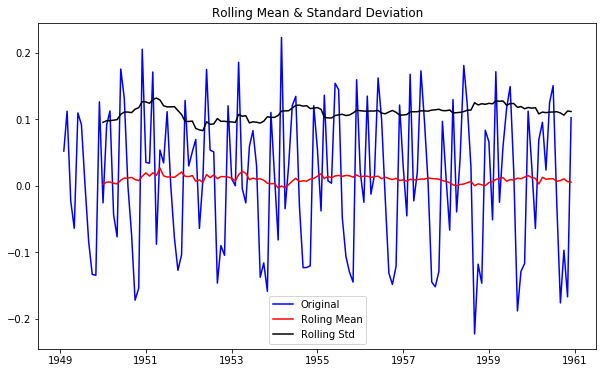

Results of Dickey-Fuller Test
Test Statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observation Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


In [27]:
dataLogDiffShifting.dropna(inplace=True)
test_stationarity(dataLogDiffShifting)

 На предыдущем шаге мы привели наш ряд к стационарному, теперь мы можем применить АРИМУ и посмотреть компоненты временных рядов

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
decomposition=seasonal_decompose(indexedDataset_logScale)

In [30]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

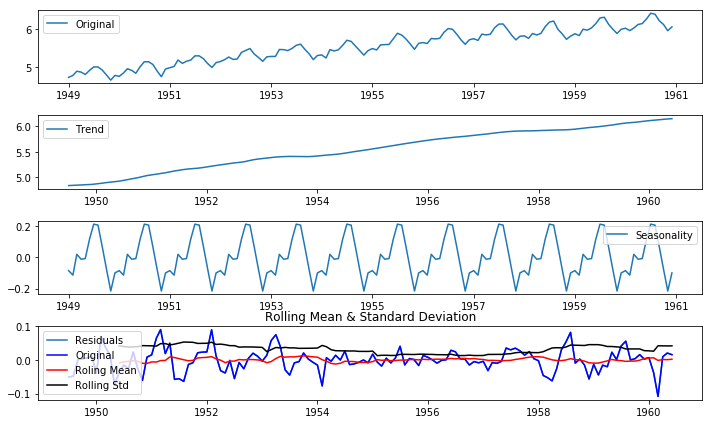

Results of Dickey-Fuller Test
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observation Used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [31]:
plt.subplot(411)
plt.plot(indexedDataset_logScale, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

Residual -это остатки в данны, то есть шумы, проверим их

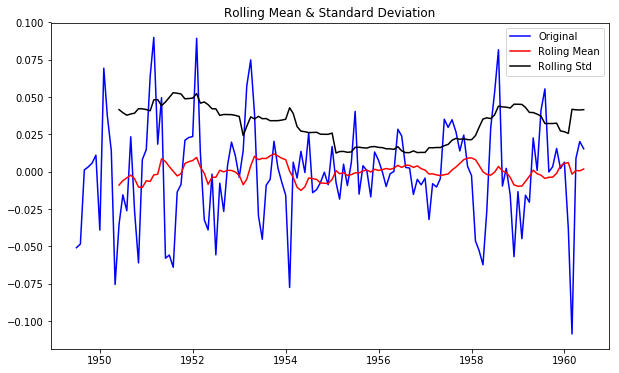

Results of Dickey-Fuller Test
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observation Used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [32]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [33]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(dataLogDiffShifting, nlags=20)
lag_pacf=pacf(dataLogDiffShifting, nlags=20, method='ols')



In [34]:
import numpy as np

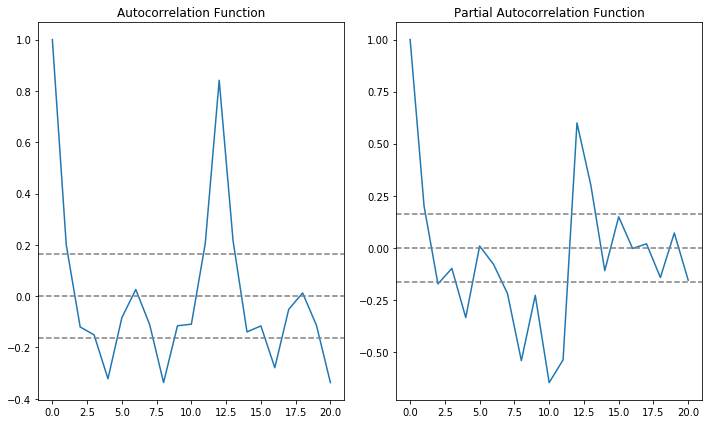

In [39]:
#Plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")
plt.tight_layout()

#Plot PACF #частичная автокорреляция

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

Применим ариму модель

In [40]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


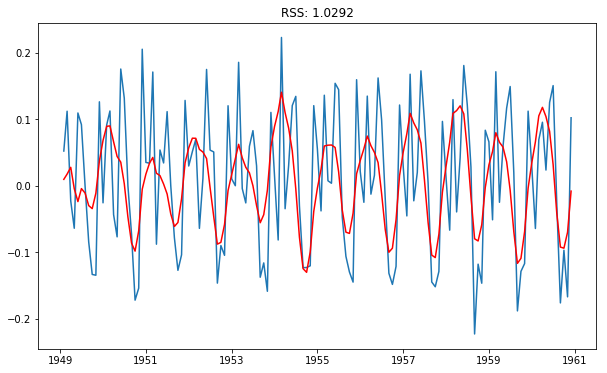

In [42]:
#AR MODEL

model=ARIMA(indexedDataset_logScale, order=(2,1,2)) # order - гиперпараметры модели
results_AR=model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - dataLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

RSS - остаточная сумма квадратов (MSE)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


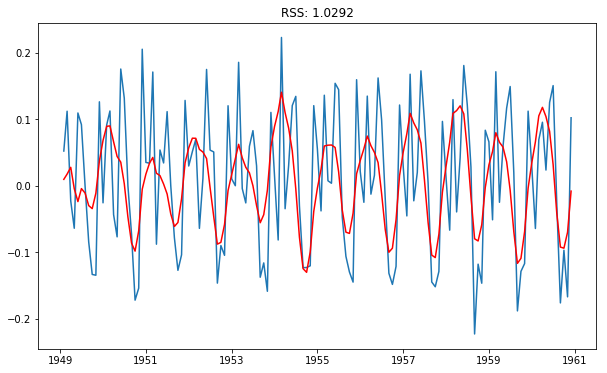

In [45]:
#MA MODEL

model=ARIMA(indexedDataset_logScale, order=(2,1,2)) # order - гиперпараметры модели
results_MA=model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - dataLogDiffShifting["#Passengers"])**2))
print('Plotting MA model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


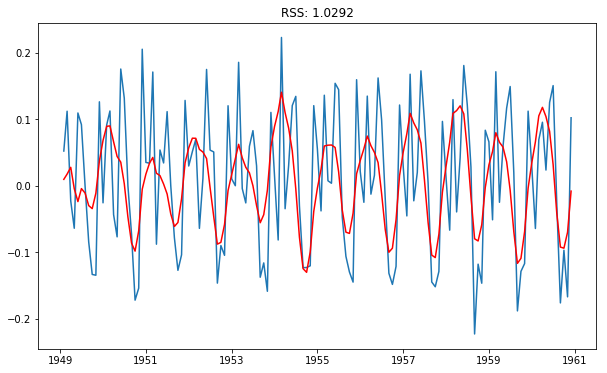

In [46]:
#ARIMA FULL MODEL

model=ARIMA(indexedDataset_logScale, order=(2,1,2)) # order - гиперпараметры модели
results_ARIMA=model.fit(disp=-1)
plt.plot(dataLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - dataLogDiffShifting["#Passengers"])**2))
print('Plotting ARIMA model')

In [48]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [50]:
predictions_ARIMA_diff.shape

(143,)

In [52]:
#Convert to cumulative sum
prediction_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [53]:
prediction_ARIMA_log=pd.Series(indexedDataset_logScale["#Passengers"].ix[0], index=indexedDataset_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Посмотрим как наша арима модель захватила изменение в данных и повторяет их

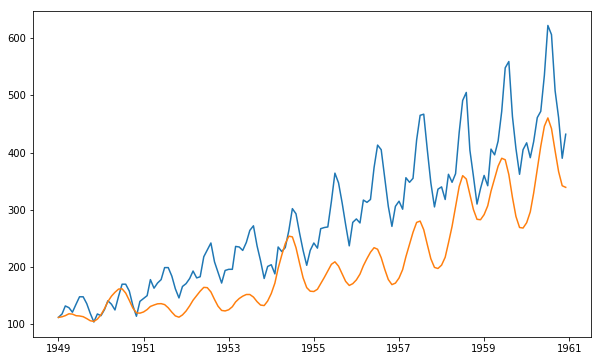

In [54]:
predictions_ARIMA=np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

### А теперь сделаем предсказание с помощью ARIMA

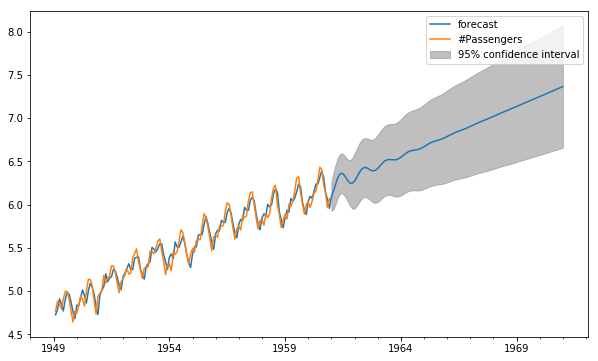

In [55]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

In [57]:
pred_ARIMA=results_ARIMA.forecast(steps=120)

In [58]:
pred_ARIMA

(array([6.09553385, 6.15281391, 6.22442953, 6.29241091, 6.34164711,
        6.36359362, 6.35784691, 6.33139311, 6.29597546, 6.26447715,
        6.24738321, 6.25025161, 6.27275821, 6.30940296, 6.35151479,
        6.38988645, 6.41727376, 6.43011053, 6.4290669 , 6.41842489,
        6.40456152, 6.39403608, 6.3918307 , 6.40019486, 6.41833674,
        6.4429539 , 6.46937421, 6.49293975, 6.51024111, 6.51989028,
        6.52267573, 6.5211238 , 6.51864516, 6.51853675, 6.52311905,
        6.53322341, 6.5481285 , 6.56591539, 6.58410292, 6.60036526,
        6.61313254, 6.62192769, 6.62737776, 6.63093114, 6.63438672,
        6.63937966, 6.64696484, 6.65739819, 6.67015303, 6.68414231,
        6.69806607, 6.71077883, 6.72157715, 6.73033966, 6.73749792,
        6.74386359, 6.75037301, 6.7578257 , 6.76668658, 6.77699799,
        6.78841295, 6.8003283 , 6.81207171, 6.82308737, 6.83307114,
        6.8420247 , 6.85022289, 6.85811196, 6.86617314, 6.87479124,
        6.88416275, 6.89426356, 6.90487862, 6.91

https://www.kaggle.com/manas13/time-series-air-passenger - хорошее применение ARIMA к этому датасету